# Google Data Analytics Capstone: Cyclistic Bike-Share Company

- Author : Nattaya Piasa

### About data
Cyclistic historical bike trip dataset file contains 13 variables:

- ride_id: Unique ID assigned with each ride
- rideable_type: Type of bicycle used on each ride — classic, docked, or electric
- started_at: Date and time at the start of each trip
- ended_at: Date and time at the end of each trip
- start_station_name: Name of the station where each journey started from
- start_station_id: ID of the station where each journey started from
- end_station_name: Name of the station where each trip ended at
- end_station_id: ID of the station where each trip ended at
- start_lat: Latitude of each starting station
- start_lng: Longitude of each starting station
- end_lat: Latitude of each ending station
- end_lng: Longitude of each ending station
- member_casual: Type of membership of each rider

## Loading data

In [5]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_theme(style="whitegrid")



path = 'data_clean' 
file_list = os.listdir(path)
file_list


['202208-divvy-tripdata.csv',
 '202205-divvy-tripdata.csv',
 '202206-divvy-tripdata.csv',
 '202210-divvy-tripdata.csv',
 '202203-divvy-tripdata.csv',
 '202212-divvy-tripdata.csv',
 '202202-divvy-tripdata.csv',
 '202201-divvy-tripdata.csv',
 '202211-divvy-tripdata.csv',
 '202207-divvy-tripdata.csv',
 '202209-divvy-tripdata.csv',
 '202204-divvy-tripdata.csv']

In [6]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

## Preparing data

In [7]:
t1 = pd.read_csv("data_clean/202201-divvy-tripdata.csv")
t2 = pd.read_csv("data_clean/202202-divvy-tripdata.csv")
t3 = pd.read_csv("data_clean/202203-divvy-tripdata.csv")
t4 = pd.read_csv("data_clean/202204-divvy-tripdata.csv")
t5 = pd.read_csv("data_clean/202205-divvy-tripdata.csv")
t6 = pd.read_csv("data_clean/202206-divvy-tripdata.csv")
t7 = pd.read_csv("data_clean/202207-divvy-tripdata.csv")
t8 = pd.read_csv("data_clean/202208-divvy-tripdata.csv")
t9 = pd.read_csv("data_clean/202209-divvy-tripdata.csv")
t10 = pd.read_csv("data_clean/202210-divvy-tripdata.csv")
t11 = pd.read_csv("data_clean/202211-divvy-tripdata.csv")
t12 = pd.read_csv("data_clean/202212-divvy-tripdata.csv")

/var/folders/04/lds_gcwj5cd3srw6s5cklzp40000gn/T/ipykernel_5340/214775827.py:9: DtypeWarning: Columns (0,1,2,3,6,7,8,9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  t9 = pd.read_csv("data_clean/202209-divvy-tripdata.csv")


In [8]:
#drop NA values (Only rows that contain all NA)
t1 = t1.dropna(how='all',axis=0)
t2 = t2.dropna(how='all',axis=0)
t3 = t3.dropna(how='all',axis=0)
t4 = t4.dropna(how='all',axis=0)
t5 = t5.dropna(how='all',axis=0)
t6 = t6.dropna(how='all',axis=0)
t7 = t7.dropna(how='all',axis=0)
t8 = t8.dropna(how='all',axis=0)
t9 = t9.dropna(how='all',axis=0)
t10 = t10.dropna(how='all',axis=0)
t11 = t11.dropna(how='all',axis=0)
t12 = t12.dropna(how='all',axis=0)

In [9]:
#Combine data set
combined_df = pd.concat([t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12], ignore_index=True)

In [7]:
combined_df.drop(['ride_id'], axis =1)

,rideable_type,started_at,ended_at,ride_length,weekdays,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,1/13/2022 11:59:47,1/13/22 12:02,0:02:57,5,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,electric_bike,1/10/22 8:41,1/10/22 8:46,0:04:21,2,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,classic_bike,1/25/22 4:53,1/25/22 4:58,0:04:21,3,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,classic_bike,1/4/22 0:18,1/4/22 0:33,0:14:56,3,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,classic_bike,1/20/22 1:31,1/20/22 1:37,0:06:02,5,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014948,classic_bike,5/12/2022 06:51,5/12/2022 06:54,00:03:44,2,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
6014949,electric_bike,14/12/2022 17:06,14/12/2022 17:19,00:12:59,4,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member
6014950,classic_bike,8/12/2022 16:27,8/12/2022 16:32,00:04:33,5,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member
6014951,classic_bike,28/12/2022 09:37,28/12/2022 09:41,00:03:56,4,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member


In [10]:
combined_df.head()

,ride_id,rideable_type,started_at,ended_at,ride_length,weekdays,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,1/13/2022 11:59:47,1/13/22 12:02,0:02:57,5,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,1/10/22 8:41,1/10/22 8:46,0:04:21,2,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,1/25/22 4:53,1/25/22 4:58,0:04:21,3,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,1/4/22 0:18,1/4/22 0:33,0:14:56,3,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,1/20/22 1:31,1/20/22 1:37,0:06:02,5,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


## Exploring data

In [11]:
print(f'the size of total data set:{combined_df.shape}')

the size of total data set:(6014953, 15)


In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6014953 entries, 0 to 6014952
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   ride_length         object 
 5   weekdays            int64  
 6   start_station_name  object 
 7   start_station_id    object 
 8   end_station_name    object 
 9   end_station_id      object 
 10  start_lat           float64
 11  start_lng           float64
 12  end_lat             float64
 13  end_lng             float64
 14  member_casual       object 
dtypes: float64(4), int64(1), object(10)
memory usage: 688.4+ MB


### Q1: How many casual riders and member riders throughout the year (2022)?

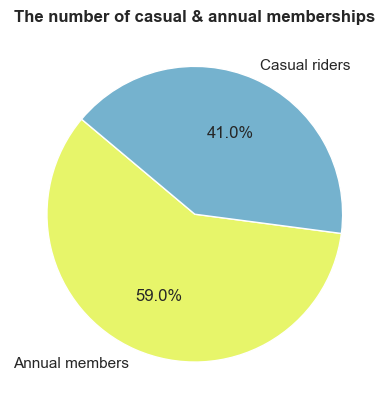

member    3345640
casual    2321977
Name: member_casual, dtype: int64


In [126]:
labels = 'Annual members', 'Casual riders'
colors = ['#e7f56a', '#75b2ce']
members = combined_df['member_casual'].value_counts()

#Plot a pie chart showing the number of riders
plt.pie(members, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('The number of casual & annual memberships', fontsize = 12, fontweight="bold")
plt.show()
print(combined_df['member_casual'].value_counts())

### Q2: In each month, how many casual and member riders through the year?

In [14]:
# Extract month from date data

## 1. Convert object data (started_at) to datetime dataset
combined_df['started_at'] = pd.to_datetime(combined_df['started_at'])
## 2. Extract month from (started_at) column
combined_df['month'] = combined_df['started_at'].dt.month

In [15]:
combined_df['month'].value_counts()

7.0     678504
8.0     653233
6.0     646939
9.0     627262
5.0     616316
10.0    539865
4.0     410216
3.0     369895
11.0    314764
1.0     289412
2.0     262045
12.0    259266
Name: month, dtype: int64

In [16]:
combined_df[combined_df['member_casual'] == 'casual']['month'].value_counts().sort_index()

1.0      89577
2.0      92444
3.0     142885
4.0     156826
5.0     281893
6.0     298534
7.0     308958
8.0     283490
9.0     257811
10.0    210053
11.0    108819
12.0     90742
Name: month, dtype: int64

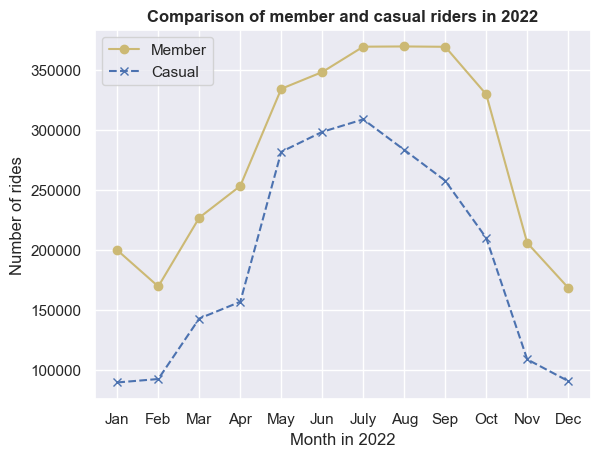

In [127]:
# Comparison of member and casual riders
x_values = ['Jan', "Feb", 'Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
#Generate value and sort it by index
y_values1 = combined_df[combined_df['member_casual'] == 'member']['month'].value_counts().sort_index()
y_values2 = combined_df[combined_df['member_casual'] == 'casual']['month'].value_counts().sort_index()

# Create the line chart for the first set of values (y_values1)
plt.plot(x_values, y_values1, label='Member', marker='o', linestyle='-', color = 'y')

# Create the line chart for the second set of values (y_values2)
plt.plot(x_values, y_values2, label='Casual', marker='x', linestyle='--', color = 'b')

# a title to the chart
plt.title('Comparison of member and casual riders in 2022', fontweight="bold" )

# labels for the x and y axes
plt.xlabel('Month in 2022')
plt.ylabel('Number of rides')

# a legend to distinguish between the two lines
plt.legend()

# Display the chart
plt.grid(True)  # Add grid lines to the plot
plt.show()

### Q3:  The number of each day the casual and member rides.

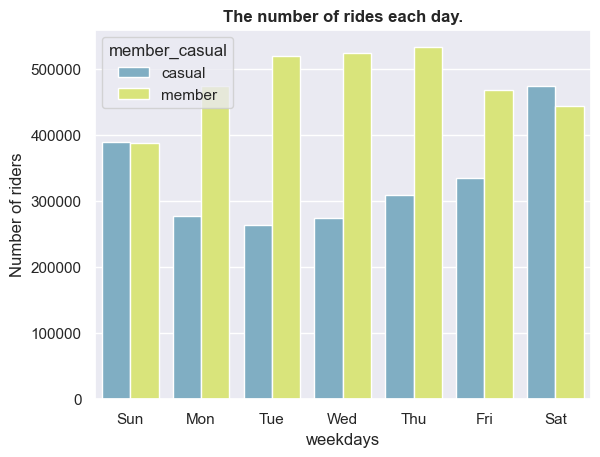

In [32]:
#Replace int value to String name for weekday
label_weekdays = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri","Sat"]
weekdays = [1, 2, 3, 4, 5, 6,7]
combined_df['weekdays_str'] = combined_df['weekdays'].replace(weekdays,label_weekdays)
palette = ['#75b2ce', '#e7f56a']
sns.set()

#Plot the graph
ax = sns.countplot(
    data=combined_df, 
    x="weekdays_str", 
    hue="member_casual", 
    order = label_weekdays,
    palette = palette
)

# a title to the chart
plt.title('The number of rides each day.',fontweight="bold")
plt.ylabel('Number of riders')
plt.xlabel('weekdays')
plt.show()

### Q4: The number of rides of each day by hour (Heat map)

/var/folders/04/lds_gcwj5cd3srw6s5cklzp40000gn/T/ipykernel_5340/2223918974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['hour'] = combined_df['started_at'].dt.hour


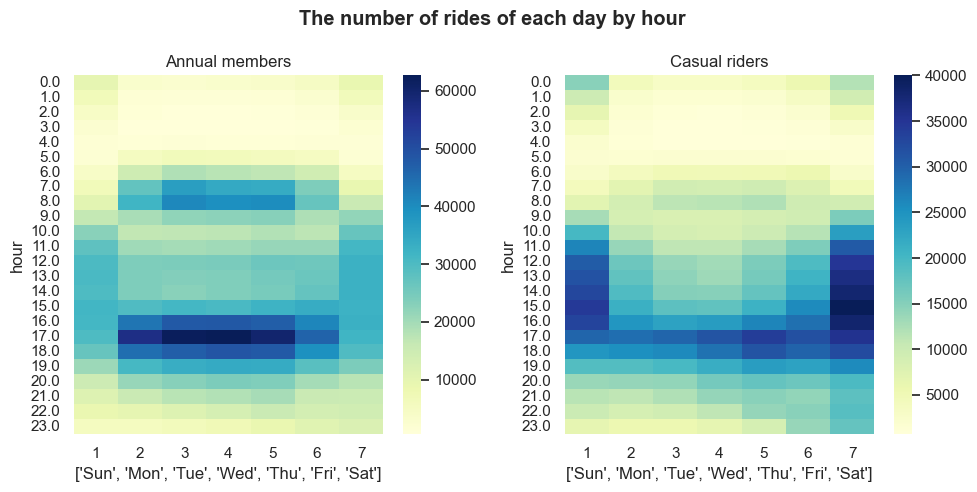

In [128]:
#Extract hour data from started_at column
combined_df['hour'] = combined_df['started_at'].dt.hour

#Pivot table for the member data
g1 = pd.pivot_table(
    combined_df,
    values="member_casual", 
    index='hour', 
    columns=['weekdays'],
    aggfunc=(lambda x : sum(x=="member"))
)

#Pivot table for the casual data
g2 = pd.pivot_table(
    combined_df,
    values="member_casual", 
    index='hour', 
    columns=['weekdays'],
    aggfunc=(lambda x : sum(x=="casual"))
)

# Plot the heatmaps
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 5))
fig.suptitle("The number of rides of each day by hour", fontweight="bold")
#Annuak members
sns.heatmap(g1, ax=ax[0], cmap="YlGnBu", xticklabels = label_weekdays )
ax[0].set_title("Annual members")
ax[0].set_xlabel(label_weekdays)

#Casual members
sns.heatmap(g2, ax=ax[1], cmap="YlGnBu")
ax[1].set_title("Casual riders")
ax[1].set_xlabel(label_weekdays)

plt.tight_layout()
plt.show()

### Q5: The duration length of each type of riders

In [104]:
#Debug the time data
combined_df[combined_df["ride_length"] == "###############################################################################################################################################################################################################################################################"]

,ride_id,rideable_type,started_at,ended_at,ride_length,weekdays,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,weekdays_str,hour
403591,2D97E3C98E165D80,classic_bike,2022-05-03 11:00:00,5/3/2022 10:55,##############################################...,7,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,41.936688,-87.636829,41.936688,-87.636829,casual,5.0,Sat,11.0
406768,7407049C5D89A13D,electric_bike,2022-05-03 11:38:00,5/3/2022 11:37,##############################################...,7,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Wellington Ave,TA1307000052,41.936313,-87.652522,41.936253,-87.652662,casual,5.0,Sat,11.0
1467055,0793C9208A64302A,electric_bike,2022-05-30 11:06:00,30/5/2022 11:06,##############################################...,2,Broadway & Waveland Ave,13325,NaN,NaN,41.949069,-87.648499,41.950000,-87.650000,casual,5.0,Mon,11.0
1635637,B897BE02B21FA75E,electric_bike,2022-07-06 19:15:00,7/6/2022 17:05,##############################################...,3,NaN,NaN,Kostner Ave & North Ave,519,41.900000,-87.740000,41.910000,-87.740000,casual,7.0,Tue,19.0
1636060,072E947E156D142D,electric_bike,2022-07-06 19:14:00,7/6/2022 17:07,##############################################...,3,W Armitage Ave & N Sheffield Ave,20254,W Armitage Ave & N Sheffield Ave,20254,41.920000,-87.650000,41.920000,-87.650000,casual,7.0,Tue,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787270,7598EB707107648D,electric_bike,2022-06-11 01:15:00,6/11/2022 01:01,##############################################...,1,Federal St & Polk St,SL-008,NaN,NaN,41.872029,-87.629522,41.930000,-87.670000,casual,6.0,Sun,1.0
5790288,75780B25C9DF4DB1,electric_bike,2022-06-11 01:59:00,6/11/2022 01:04,##############################################...,1,Wilton Ave & Diversey Pkwy,TA1306000014,NaN,NaN,41.932236,-87.652662,41.940000,-87.660000,member,6.0,Sun,1.0
5811524,4139B11634039661,classic_bike,2022-06-11 01:58:00,6/11/2022 01:11,##############################################...,1,Clark St & Grace St,TA1307000127,Broadway & Berwyn Ave,13109,41.950780,-87.659172,41.978353,-87.659753,member,6.0,Sun,1.0
5825681,1BA8DEBE4E13DD1D,electric_bike,2022-06-11 01:52:00,6/11/2022 01:04,##############################################...,1,State St & Chicago Ave,21544,NaN,NaN,41.896048,-87.628493,41.930000,-87.650000,casual,6.0,Sun,1.0


In [105]:
#We found about 100 rows of data that contain ### values in timedelta data, so we will drop this.
combined_df = combined_df[combined_df["ride_length"] != "###############################################################################################################################################################################################################################################################"]

In [106]:
#convert string data to timedelta data
combined_df['ride_length'] = pd.to_timedelta(combined_df['ride_length'])
#calculate the mean value
average_duration = combined_df['ride_length'].mean()
#
average_duration_member = combined_df[combined_df['member_casual'] == 'member']['ride_length'].mean()
average_duration_casual = combined_df[combined_df['member_casual'] == 'casual']['ride_length'].mean()
print(f'the average of riding time is: {average_duration}')
print(f'the average riding time of member riders is: {average_duration_member}')
print(f'the average riding time of casual riders is: {average_duration_casual}')

/var/folders/04/lds_gcwj5cd3srw6s5cklzp40000gn/T/ipykernel_5340/4072661737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['ride_length'] = pd.to_timedelta(combined_df['ride_length'])


the average of riding time is: 0 days 00:15:36.047996185
the average riding time of member riders is: 0 days 00:12:25.512300486
the average riding time of casual riders is: 0 days 00:22:30.562613238


### Q6: The type of bicycles were ride.

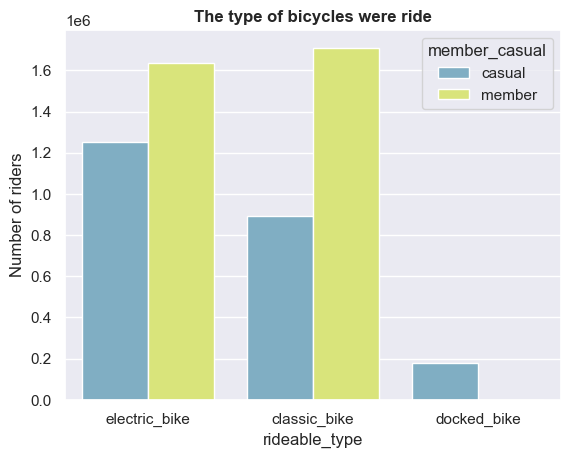

In [125]:
sns.countplot(data=combined_df, 
              x="rideable_type", 
              hue="member_casual",
             palette = palette)
plt.title("The type of bicycles were ride",fontweight="bold")
plt.ylabel('Number of riders')
plt.show()

### Q7: Popular start station

In [110]:
member_start = combined_df[combined_df['member_casual'] == 'member']['start_station_name'].value_counts().head(10)
casual_start = combined_df[combined_df['member_casual'] == 'casual']['start_station_name'].value_counts().head(10)
member_destination = combined_df[combined_df['member_casual'] == 'member']['end_station_name'].value_counts().head(10)
casual_destination = combined_df[combined_df['member_casual'] == 'casual']['end_station_name'].value_counts().head(10)

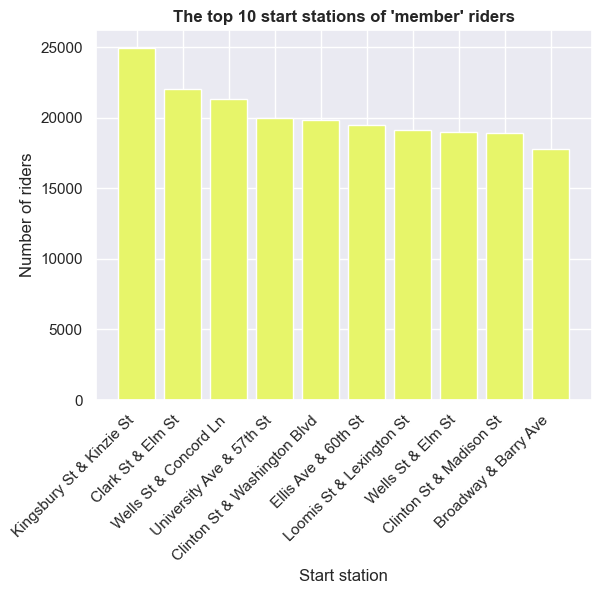

The top 10 start station of 'member' riders


Kingsbury St & Kinzie St        24937
Clark St & Elm St               22040
Wells St & Concord Ln           21298
University Ave & 57th St        19953
Clinton St & Washington Blvd    19827
Ellis Ave & 60th St             19503
Loomis St & Lexington St        19128
Wells St & Elm St               18987
Clinton St & Madison St         18931
Broadway & Barry Ave            17758
Name: start_station_name, dtype: int64

In [121]:
plt.bar(member_start.index,member_start,
       color = "#e7f56a" )
plt.xticks(rotation = 45, ha='right')
plt.title("The top 10 start stations of 'member' riders", fontweight="bold")
# labels for the x and y axes
plt.xlabel('Start station')
plt.ylabel('Number of riders')
plt.show()

print("The top 10 start station of 'member' riders")
member_start

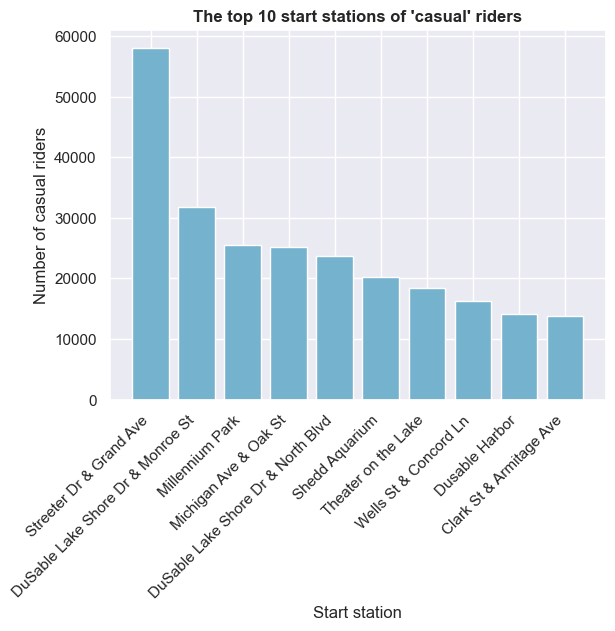


The top 10 start station of 'casual' riders


Streeter Dr & Grand Ave               58094
DuSable Lake Shore Dr & Monroe St     31862
Millennium Park                       25529
Michigan Ave & Oak St                 25265
DuSable Lake Shore Dr & North Blvd    23657
Shedd Aquarium                        20265
Theater on the Lake                   18452
Wells St & Concord Ln                 16217
Dusable Harbor                        14104
Clark St & Armitage Ave               13804
Name: start_station_name, dtype: int64

In [122]:
#The top 10 start station of 'casual' riders"
plt.bar(casual_start.index,casual_start, color = "#75b2ce")
plt.xticks(rotation = 45, ha='right')
plt.title("The top 10 start stations of 'casual' riders", fontweight="bold")
# labels for the x and y axes
plt.xlabel('Start station')
plt.ylabel('Number of casual riders')
plt.show()
print("\nThe top 10 start station of 'casual' riders")
casual_start

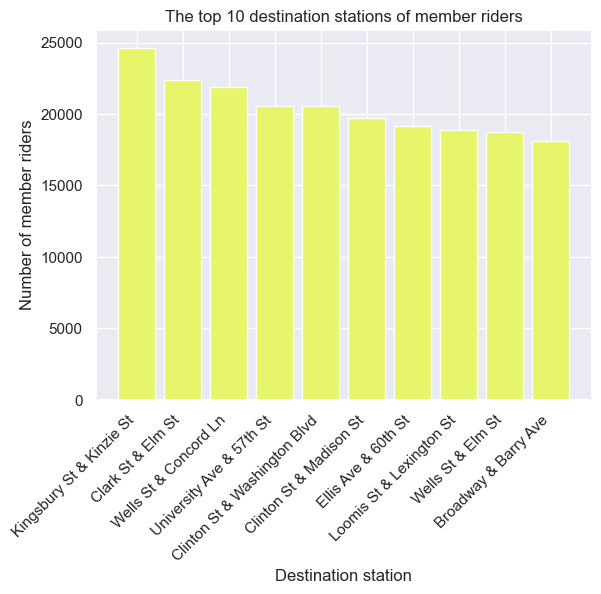


The top 10 destination stations of member riders


Kingsbury St & Kinzie St        24636
Clark St & Elm St               22367
Wells St & Concord Ln           21914
University Ave & 57th St        20534
Clinton St & Washington Blvd    20529
Clinton St & Madison St         19725
Ellis Ave & 60th St             19198
Loomis St & Lexington St        18903
Wells St & Elm St               18722
Broadway & Barry Ave            18129
Name: end_station_name, dtype: int64

In [117]:
#The top 10 destination stations of member riders
plt.bar(member_destination.index,
        member_destination, color = "#e7f56a")
plt.xticks(rotation = 45, ha='right')
plt.title("The top 10 destination stations of member riders", fontweight="bold")
# labels for the x and y axes
plt.xlabel('Destination station')
plt.ylabel('Number of member riders')
plt.show()
print("\nThe top 10 destination stations of member riders")
member_destination

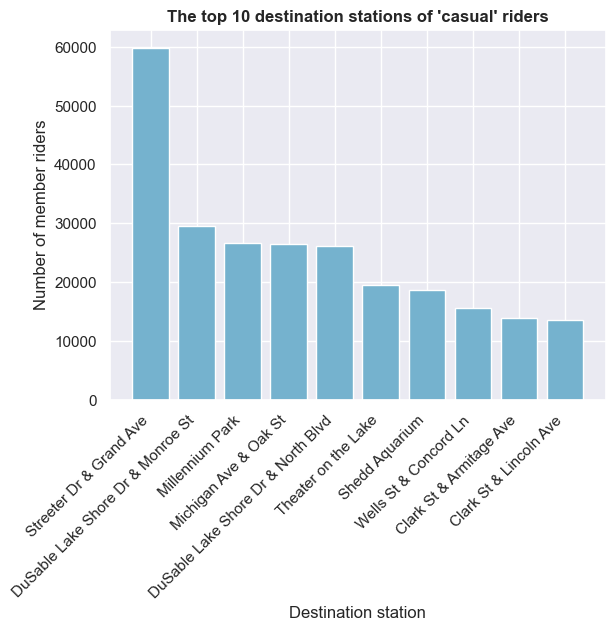

The top 10 destination station of 'casual' riders


Streeter Dr & Grand Ave               59876
DuSable Lake Shore Dr & Monroe St     29603
Millennium Park                       26677
Michigan Ave & Oak St                 26450
DuSable Lake Shore Dr & North Blvd    26144
Theater on the Lake                   19418
Shedd Aquarium                        18631
Wells St & Concord Ln                 15507
Clark St & Armitage Ave               13851
Clark St & Lincoln Ave                13594
Name: end_station_name, dtype: int64

In [124]:
#The top 10 destination station of 'casual' riders
plt.bar(casual_destination.index,casual_destination, color = "#75b2ce")
plt.xticks(rotation = 45, ha='right')
plt.title("The top 10 destination stations of 'casual' riders", fontweight="bold")
# labels for the x and y axes
plt.xlabel('Destination station')
plt.ylabel('Number of member riders')
plt.show()

print("The top 10 destination station of 'casual' riders")
casual_destination